In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt("seizure.csv", delimiter=",", dtype=np.int)[1:, 1:]

In [3]:
predictors = range(data.shape[1])[-3:]

In [4]:
# Predictors: baseline seizure count, treatment, and age
x = data[:, predictors]

# Cumulative seizure count during treatment period
y = data[:, :4].sum(axis=1)

# Seizure counts during each 2-week period
y1 = data[:, 0]
y2 = data[:, 1]
y3 = data[:, 2]
y4 = data[:, 3]

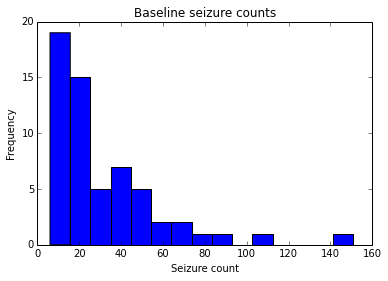

In [5]:
# Let's visualize a histogram of the number of seizures
# experienced in the baseline period

plt.title("Baseline seizure counts")
plt.hist(x[:, 1], bins=15)
plt.xlabel("Seizure count")
plt.ylabel("Frequency")
plt.show()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


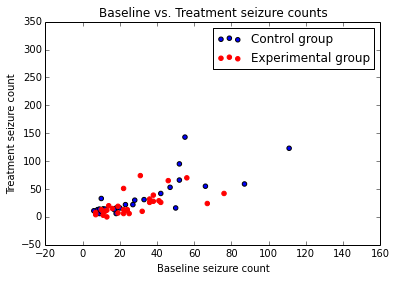

In [6]:
# Scatter 

plt.scatter(x[:, 1][x[:, 0] == 0], y[x[:, 0] == 0], label="Control group")
plt.scatter(x[:, 1][x[:, 0] == 1], y[x[:, 0] == 1], color="red", label="Experimental group")
plt.xlabel("Baseline seizure count")
plt.ylabel("Treatment seizure count")
plt.title("Baseline vs. Treatment seizure counts")
plt.legend(loc="best")
plt.show()

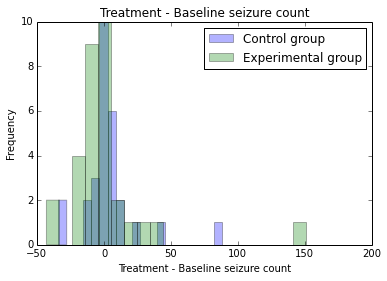

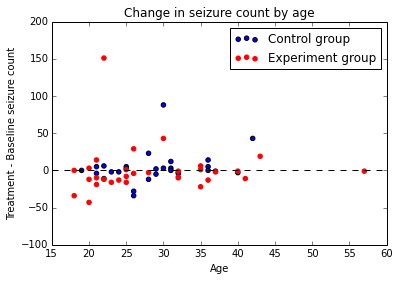

In [7]:
# Calculate difference in baseline and treatment seizure counts
diffs = y - x[:, 1]

plt.hist(diffs[x[:, 0] == 0], bins=20, alpha = 0.3, label="Control group")
plt.hist(diffs[x[:, 0] == 1], bins=20, alpha = 0.3, label="Experimental group")
plt.xlabel("Treatment - Baseline seizure count")
plt.ylabel("Frequency")
plt.title("Treatment - Baseline seizure count")
plt.legend(loc="best")
plt.show()

# Visualize difference in baseline and treatment seizure counts based on age
plt.scatter(x[:,2][x[:,0] == 0], diffs[x[:,0] == 0], label="Control group")
plt.scatter(x[:,2][x[:,0] == 1], diffs[x[:,0] == 1], color="red", label="Experiment group")

# Plot a horizontal line at diffs = 0
plt.plot(np.linspace(15, 60), [0]*50, '--', color="black")
plt.title("Change in seizure count by age")
plt.xlabel("Age")
plt.ylabel("Treatment - Baseline seizure count")
plt.xlim([15,60])
plt.legend(loc="best")
plt.show()

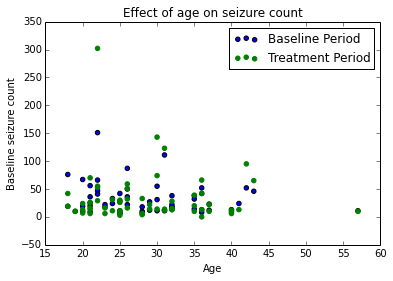

In [8]:
# Look at some characteristics of epilepsy patients

# (1) Age versus seizure count in baseline period
plt.title("Effect of age on seizure count")
plt.scatter(x[:,2], x[:,1], label="Baseline Period")
plt.xlabel("Age")
plt.ylabel("Baseline seizure count")

# (2) Age versus seizure count in treatment period
plt.scatter(x[:,2], y, color="green", label="Treatment Period")
plt.legend(loc="best")
plt.show()